In [1]:
# Evaluate Process
    # >> Load both trained models (custom CNN & MobileNetV2)
    # >> Load the test set (once, shared for both models)
    # >> Evaluate each model on the same test set
    # >> Compare performance using accuracy, precision, recall, F1-score
    # >> Create a confusion matrix and summary comparison table for your report

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


In [2]:
# Load Test Set (Shared for Both Models)

# Set test path
TEST_DIR = "../dataset/test"
IMAGE_SIZE = (224, 224)   # Use 224x224 for both models (MobileNet and resized CNN)

# Load test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# True labels
y_true = test_generator.classes


Found 624 images belonging to 2 classes.


In [4]:
# Load both models
cnn_model = load_model("../models/custom_cnn.keras")
mobile_model = load_model("../models/mobilenetv2_transfer.keras")


# For custom CNN (trained on 150x150 images)
cnn_test_datagen = ImageDataGenerator(rescale=1./255)

cnn_test_generator = cnn_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# For MobileNetV2 (trained on 224x224 images)
mobilenet_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

mobilenet_test_generator = mobilenet_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Get true labels (same for both since the order is fixed)
y_true = mobilenet_test_generator.classes

# Predict using custom CNN
y_pred_cnn = (cnn_model.predict(cnn_test_generator) > 0.5).astype(int).flatten()

# Predict using MobileNetV2
y_pred_mobile = (mobile_model.predict(mobilenet_test_generator) > 0.5).astype(int).flatten()



Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 782ms/step


In [10]:
# Classification Reports

print("===================== Custom CNN Report =====================\n")
print(classification_report(y_true, y_pred_cnn, target_names=["NORMAL", "PNEUMONIA"]))

print("\n===================== MobileNetV2 Report =====================\n")
print(classification_report(y_true, y_pred_mobile, target_names=["NORMAL", "PNEUMONIA"]))



===================== Custom CNN Report =====================

              precision    recall  f1-score   support

      NORMAL       0.97      0.36      0.53       234
   PNEUMONIA       0.72      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.84      0.68      0.68       624
weighted avg       0.81      0.76      0.72       624


===================== MobileNetV2 Report =====================

              precision    recall  f1-score   support

      NORMAL       0.98      0.56      0.71       234
   PNEUMONIA       0.79      0.99      0.88       390

    accuracy                           0.83       624
   macro avg       0.88      0.78      0.80       624
weighted avg       0.86      0.83      0.82       624



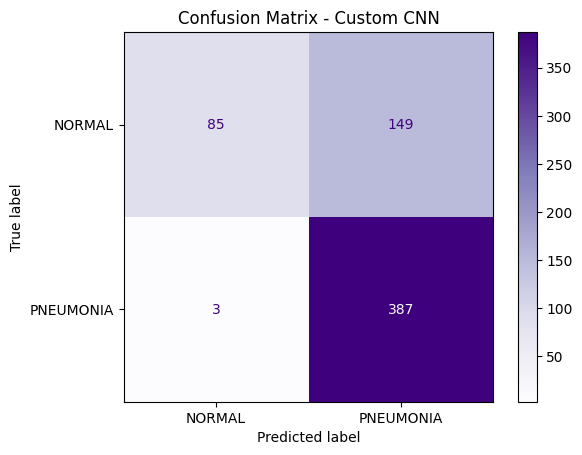

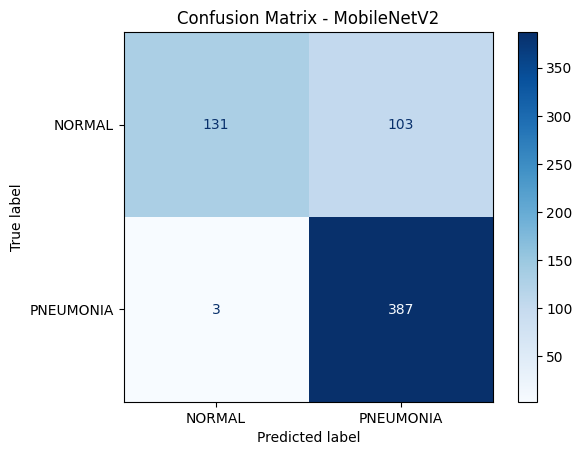

In [11]:
# Confusion Matrices
# Custom CNN
cm_cnn = confusion_matrix(y_true, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=["NORMAL", "PNEUMONIA"])
disp_cnn.plot(cmap='Purples')
plt.title("Confusion Matrix - Custom CNN")
plt.show()

# MobileNetV2
cm_mobile = confusion_matrix(y_true, y_pred_mobile)
disp_mobile = ConfusionMatrixDisplay(confusion_matrix=cm_mobile, display_labels=["NORMAL", "PNEUMONIA"])
disp_mobile.plot(cmap='Blues')
plt.title("Confusion Matrix - MobileNetV2")
plt.show()


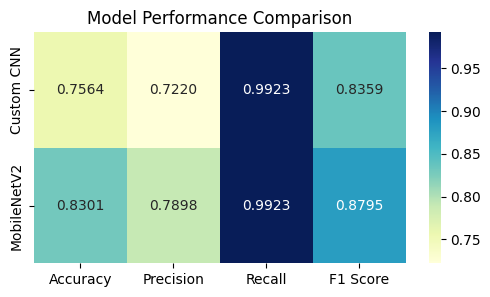

Model Performance Comparison:
             Accuracy  Precision  Recall  F1 Score
Custom CNN     0.7564     0.7220  0.9923    0.8359
MobileNetV2    0.8301     0.7898  0.9923    0.8795


In [ ]:
# Comparison Table

# Define metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
    }

# Collect results
results = {
    "Custom CNN": evaluate_model(y_true, y_pred_cnn),
    "MobileNetV2": evaluate_model(y_true, y_pred_mobile),
}

# Convert to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)  # Round to 4 decimal places

# Display the table
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.heatmap(results_df, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Model Performance Comparison")
plt.show()

print("Model Performance Comparison:")
print(results_df) #same but text format
